In [58]:
%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

from core import *

In [59]:
def plot_network(G, color_attr, attr_color_map, size_attr=None):

    color_map = [attr_color_map[G.nodes[node][color_attr]] for node in G.nodes]
    
    if size_attr:
        sizes = [500+1000*G.nodes[node][size_attr] for node in G.nodes]
        labels = [str(node) + ' ' + str(round(G.nodes[node][size_attr], 1)) for node in G.nodes]
    else:
        sizes = [500] * len(G.nodes)
        labels = list(G.nodes)
        
    labels = dict(zip(G.nodes, labels))

    nx.draw_spring(G, with_labels=True, node_color=color_map, node_size=sizes, labels=labels, linewidths=10, width=2, font_color='white')
    plt.show()

# 🧪 [Jensen et. al 2015](https://arxiv.org/pdf/1509.08295.pdf) Syntethic Network experiment

In [77]:
# Node's colors
orientation_to_color = {
    'L': 'red',
    'R': 'blue',
    'N': 'gray'
}

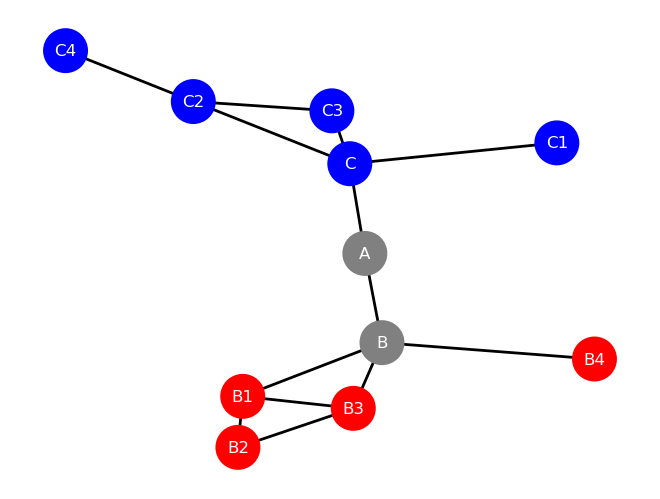

In [78]:
# Equal Jensen et. al 
G = nx.Graph()

G.add_node('A', orientation='N', label='A')
G.add_node('B', orientation='N', label='B')

G.add_node('B1', orientation='L', label='B1')
G.add_node('B2', orientation='L', label='B2')
G.add_node('B3', orientation='L', label='B3')
G.add_node('B4', orientation='L', label='B4')

G.add_node('C', orientation='R', label='C')
G.add_node('C1', orientation='R', label='C1')
G.add_node('C2', orientation='R', label='C2')
G.add_node('C3', orientation='R', label='C3')
G.add_node('C4', orientation='R', label='C4')

G.add_edge('A', 'B')
G.add_edge('A', 'C')

G.add_edge('B', 'B1')
G.add_edge('B', 'B3')
G.add_edge('B', 'B4')
G.add_edge('B1', 'B2')
G.add_edge('B1', 'B3')
G.add_edge('B2', 'B3')

G.add_edge('C', 'C1')
G.add_edge('C', 'C2')
G.add_edge('C', 'C3')
G.add_edge('C2', 'C4')
G.add_edge('C2', 'C3')


plot_network(G, 'orientation', orientation_to_color)

In [79]:
# calculate centralities
extract_betweenness(G)
extract_bridgeness(G)
extract_intergroup_bridging(G, 'orientation')
extract_degrees(G)

nx.write_graphml_lxml(G, 'data/syntethic.graphml')  

Calculating Betweeness centrality...
Calculating Bridgeness centrality...
Calculating Intergroup Reaching centrality...
Calculating degree centralities...


In [80]:
# get centrality values as a dataframe
df = graph_to_dataframe(G)
df.sort_values('label', ascending=True).round(2)[['label', 'orientation', 'degree', 'betweenness', 'bridgeness', 'intergroup_bridging']]

,label,orientation,degree,betweenness,bridgeness,intergroup_bridging
0,A,N,2,0.93,1.00,1.00
1,B,N,4,1.00,0.31,0.72
2,B1,L,3,0.15,0.00,0.00
3,B2,L,2,0.00,0.00,0.00
4,B3,L,3,0.15,0.00,0.00
5,B4,L,1,0.00,0.00,0.00
6,C,R,4,1.00,0.31,0.31
7,C1,R,1,0.00,0.00,0.00
8,C2,R,3,0.33,0.00,0.00
9,C3,R,2,0.00,0.00,0.00


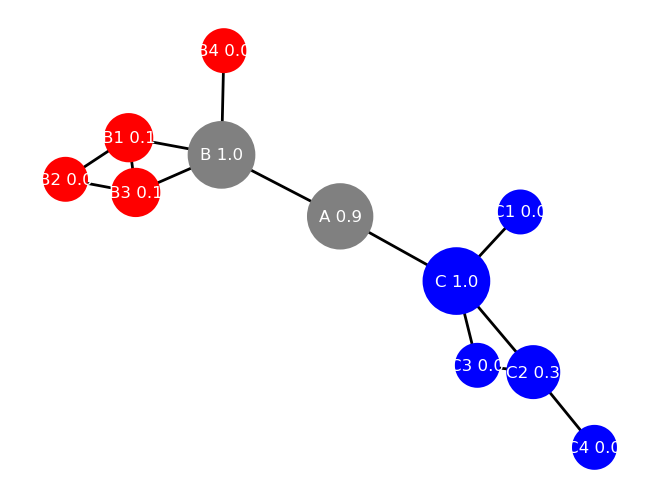

In [81]:
plot_network(G, 'orientation', orientation_to_color, 'betweenness')

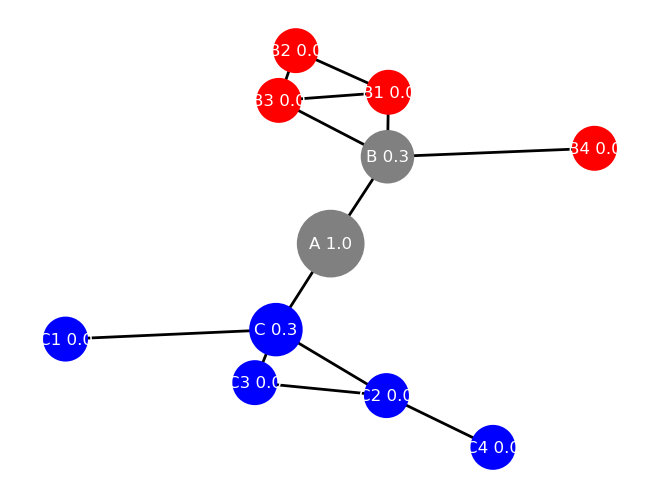

In [82]:
plot_network(G, 'orientation', orientation_to_color, 'bridgeness')

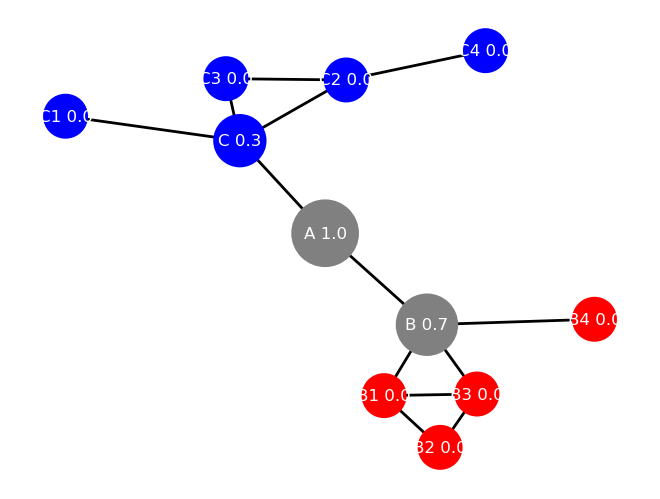

In [83]:
plot_network(G, 'orientation', orientation_to_color, 'intergroup_bridging')

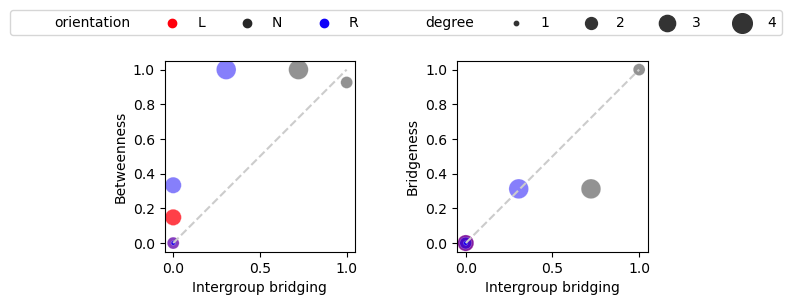

In [84]:
orientations_palette = sns.set_palette(sns.color_palette(['#FF000C', '#272727', '#0F00F9'])) # Red, Grey, Blue 

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=False, figsize=(6, 2.5))
fig.tight_layout() 

for i, metric in enumerate(['betweenness', 'bridgeness']):

    sns.scatterplot(data=df, x='intergroup_bridging', y=metric, hue='orientation', hue_order=['L', 'N', 'R'], 
                    size='degree', sizes=(10, 200), alpha=.5, legend="full", palette=orientations_palette, ax=axs[i])
    axs[i].legend([],[], frameon=False)
    axs[i].set_xlabel('Intergroup bridging')
    axs[i].set_ylabel(metric.capitalize())
    axs[i].set_box_aspect(1)
    axs[i].plot([0,1], [0, 1], ls='--', c='.8')

# add a single legend for the whole plot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=11, fancybox=True, shadow=False, )

# add a single label for x-axis
#fig.text(0.5, -0.01, 'Bubble Popper', ha='center')

fig.savefig('figures/fig_centralities_comparison_scatterplot.png', format='png', dpi=300, bbox_inches='tight', )

# 🧪 Zachary’s Karate Club experiment

Zachary's Karate Club is a famous social network graph that was first introduced by sociologists Wayne W. Zachary in 1977. The graph represents a social network of a university karate club, where each node represents a member of the club, and each edge represents a social connection between members.

The graph consists of 34 nodes and 78 edges. The nodes are labeled from 1 to 34, and each node represents a member of the karate club. The edges represent social ties between members of the club, where an edge connects two nodes if the corresponding members interact outside of the club.

The graph is known for its community structure, which was discovered by Zachary himself. The community structure refers to the fact that the graph can be divided into two distinct communities, each of which contains members who have strong social ties with each other, but weaker ties with members of the other community. This community structure was discovered by Zachary through the use of a divisive algorithm that iteratively removes edges from the graph until it is divided into two communities.

The graph has become a classic example in network analysis and is often used to study the structure and dynamics of social networks. It has been used to study various phenomena, such as the spread of rumors and the emergence of leadership in social networks.

In [85]:
# Node's colors
club_to_color = {
    'Mr. Hi': 'red',
    'Officer': 'blue',
    'Bubble Reacher': 'gray'
}

#### Load Zachary’s Karate Club graph

In [86]:
G = nx.karate_club_graph()

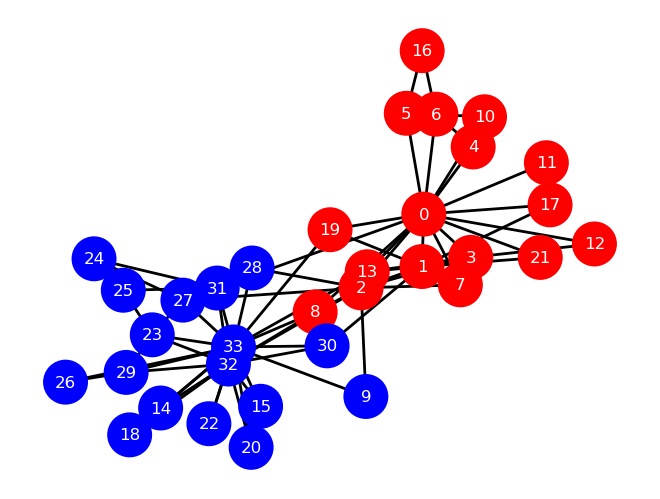

In [87]:
plot_network(G, 'club', club_to_color)

In [88]:
print("Node \tDegree \tClub")
for v in G:
    print(f"{v:4} \t{G.degree(v):6} \t{G.nodes[v]['club']}")

Node 	Degree 	Club
   0 	    16 	Mr. Hi
   1 	     9 	Mr. Hi
   2 	    10 	Mr. Hi
   3 	     6 	Mr. Hi
   4 	     3 	Mr. Hi
   5 	     4 	Mr. Hi
   6 	     4 	Mr. Hi
   7 	     4 	Mr. Hi
   8 	     5 	Mr. Hi
   9 	     2 	Officer
  10 	     3 	Mr. Hi
  11 	     1 	Mr. Hi
  12 	     2 	Mr. Hi
  13 	     5 	Mr. Hi
  14 	     2 	Officer
  15 	     2 	Officer
  16 	     2 	Mr. Hi
  17 	     2 	Mr. Hi
  18 	     2 	Officer
  19 	     3 	Mr. Hi
  20 	     2 	Officer
  21 	     2 	Mr. Hi
  22 	     2 	Officer
  23 	     5 	Officer
  24 	     3 	Officer
  25 	     3 	Officer
  26 	     2 	Officer
  27 	     4 	Officer
  28 	     3 	Officer
  29 	     4 	Officer
  30 	     4 	Officer
  31 	     6 	Officer
  32 	    12 	Officer
  33 	    17 	Officer


#### Create a new node A between the two nodes with the highest degree on each club

In [89]:
# Add an A node linked to B and C (the effective Bubble Reacher)
G.add_node('A', club='Bubble Reacher')

# Link to Mr. Hi highest degree nodes
G.add_edge('A', 0) 
G.add_edge('A', 2)

# Link to Officer highest degree nodes
G.add_edge('A', 33) 
G.add_edge('A', 32) 

#### Calculate centralities

In [90]:
# calculate centralities
extract_betweenness(G)
extract_bridgeness(G)
extract_intergroup_bridging(G, attr='club')

nx.write_graphml_lxml(G, 'data/karate-club.graphml')  

Calculating Betweeness centrality...
Calculating Bridgeness centrality...
Calculating Intergroup Reaching centrality...


In [91]:
df = graph_to_dataframe(G)

In [92]:
df

,club,betweenness,bridgeness,intergroup_bridging
0,Mr. Hi,1.000000,1.000000,0.792539
1,Mr. Hi,0.047496,0.000000,0.084476
2,Mr. Hi,0.198190,0.540775,1.000000
3,Mr. Hi,0.000000,0.000000,0.000000
4,Mr. Hi,0.001618,0.000000,0.000000
5,Mr. Hi,0.051772,0.000000,0.000000
6,Mr. Hi,0.051772,0.000000,0.000000
7,Mr. Hi,0.000000,0.000000,0.000000
8,Mr. Hi,0.007858,0.875536,0.809253
9,Officer,0.000000,0.003676,0.005590


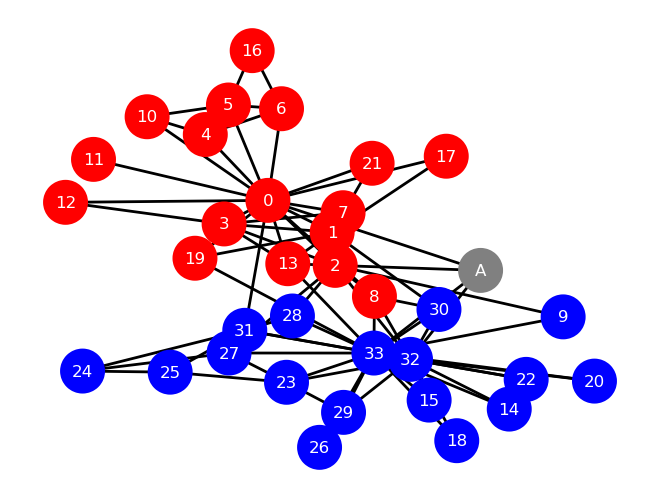

In [93]:
plot_network(G, 'club', club_to_color)